In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, "/home/storage/hans/jax_reco_new")
from lib.plotting import adjust_plot_1d

In [2]:
def GreatCircleDistance(azi_1, zen_1, azi_2, zen_2):
        ra_1 = azi_1
        ra_2 = azi_2
        dec_1 = np.pi/2.0 - zen_1
        dec_2 = np.pi/2.0 - zen_2
        '''Compute the great circle distance between two events'''
        '''All coordinates must be given in radians'''
        delta_dec = np.abs(dec_1 - dec_2)
        delta_ra = np.abs(ra_1 - ra_2)
        x = (np.sin(delta_dec / 2.))**2. + np.cos(dec_1) *\
            np.cos(dec_2) * (np.sin(delta_ra / 2.))**2.
        return 2. * np.arcsin(np.sqrt(x))

def get_gcd(results):
    scale = 20.0
    reco_zenith, reco_azimuth = results[:, -6]/scale, results[:, -5]/scale
    track_src_v = results[:, 2:4]
    true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
    smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]
    gcd = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, reco_azimuth, reco_zenith))
    gcd_smpe = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, smpe_azimuth, smpe_zenith))
    muon_energy = results[:, 0]
    return gcd, gcd_smpe, muon_energy

def get_zen_azi(results):
    scale = 20.0
    reco_zenith, reco_azimuth = results[:, -6]/scale, results[:, -5]/scale
    track_src_v = results[:, 2:4]
    true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
    smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]
    return track_src_v[:, 0], track_src_v[:, 1], reco_zenith, reco_azimuth, smpe_zenith, smpe_azimuth

def get_hist(results):
    gcd, gcd_smpe, muon_energy = get_gcd(results)
    print(np.amax(gcd), np.amax(gcd_smpe))
    print(np.median(gcd), np.median(gcd_smpe))
    bins = np.linspace(0.0, 3.0, 41)
    cts, _ = np.histogram(gcd, bins=bins)
    cts_smpe, _ = np.histogram(gcd_smpe, bins=bins)
    return cts, bins, cts_smpe

def get_percentiles(results):
    gcd, gcd_smpe, muon_energy = get_gcd(results)
    ps = np.percentile(gcd, [16, 50, 84])
    ps_smpe = np.percentile(gcd_smpe, [16, 50, 84])
    return ps, ps_smpe

In [14]:
event_id = '20027'
#event_id = '1722'
#event_id = '10644'
#event_id = '1022'
#event_id = '10393'
#event_id = '10738'
dat = np.load(f'/home/storage/hans/jax_reco_new/examples/reco_realtime/postjitter/results/reco_result_{event_id}_tfrecord.npy')

In [15]:
TPN_MPE, bins, S_MPE = get_hist(dat)
true_zen, true_azi, reco_zen, reco_azi, smpe_zen, smpe_azi = get_zen_azi(dat)

0.32500001270478635 0.24855303531490852
0.043640439360559294 0.10727373382087824


In [16]:
print(reco_zen)

[1.60681455 1.60439279 1.60422339 1.60510868 1.60439279 1.6041178
 1.60439279 1.60455687 1.60503317 1.60461304 1.60529403 1.60439279
 1.60342143 1.60439279 1.60461161 1.60282829 1.60279032 1.60439279
 1.60364432 1.60438894 1.60439279 1.60318104 1.60439279 1.6052839
 1.6061294  1.60439287 1.60439279 1.60544448 1.60416481 1.60439279
 1.60339549 1.60439279 1.60373162 1.60439279 1.60314516 1.6026477
 1.60392425 1.60427682 1.6056196  1.60439279 1.60439279 1.60569228
 1.6029576  1.60439279 1.60413225 1.60477925 1.60439279 1.60439279
 1.60439279 1.60439279 1.60468385 1.60439279 1.60450874 1.60486222
 1.602305   1.6044503  1.60439279 1.60493713 1.59873773 1.60439279
 1.60439279 1.60402742 1.6049645  1.60439279 1.60304384 1.60370822
 1.60219997 1.60439279 1.60401427 1.60439279 1.60571612 1.60439279
 1.60482995 1.60439279 1.60312711 1.60439279 1.60282849 1.601843
 1.60282389 1.60396034 1.60666625 1.6056607  1.60310897 1.60199185
 1.60439279 1.60439279 1.60577658 1.60439279 1.60439279 1.60464064


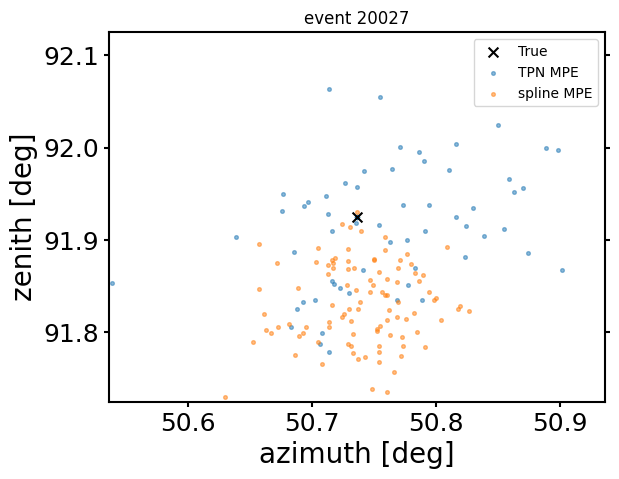

In [19]:
fig, ax = plt.subplots()
plt.scatter(np.rad2deg(true_azi)[0:1], np.rad2deg(true_zen)[0:1], marker='x', color='black', label='True', s=50, zorder=5)
plt.scatter(np.rad2deg(reco_azi), np.rad2deg(reco_zen), label='TPN MPE', s=7, color='tab:blue', alpha=0.5)
plt.scatter(np.rad2deg(smpe_azi), np.rad2deg(smpe_zen), label='spline MPE', s=7, color='tab:orange', alpha=0.5)

plt.legend()
d_zen = 0.2
plt.xlim()
plt.ylim()

plot_args = {'xlabel':'azimuth [deg]', 
                 'ylabel':'zenith [deg]', 
                 'xlim':[np.rad2deg(true_azi[0])-d_zen, np.rad2deg(true_azi[0])+d_zen], 
                 'ylim':[np.rad2deg(true_zen[0])-d_zen, np.rad2deg(true_zen[0])+d_zen]}
adjust_plot_1d(fig, ax, plot_args=plot_args)
plt.title(f"event {event_id}")
plt.show()

In [7]:
import glob
fs = glob.glob('/home/storage/hans/jax_reco_new/examples/reco_realtime/results/*.npy')

tpn_mpe_v = []
s_mpe_v = []

for f in fs:
    dat = np.load(f)
    tpn_mpe, s_mpe = get_percentiles(dat)
    tpn_mpe_v.append(tpn_mpe)
    s_mpe_v.append(s_mpe)

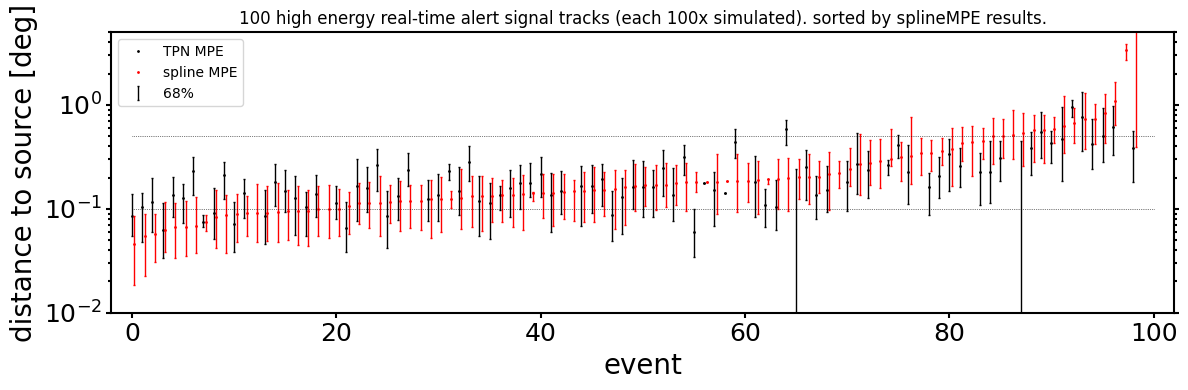

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
x = np.array(list(range(99)))

y = np.array([t[1] for t in tpn_mpe_v])
z = np.array([t[1] for t in s_mpe_v])

idx = np.argsort(z)
z = z[idx]
y = y[idx]
y_err_up = np.array([t[2] for t in tpn_mpe_v])[idx] - y
y_err_low = y - np.array([t[0] for t in tpn_mpe_v])[idx]

#y_err_up = np.array([t[2] for t in tpn_mpe_v]) - y
#y_err_low = y - np.array([t[0] for t in tpn_mpe_v])


z_err_up = np.array([t[2] for t in s_mpe_v])[idx] - z
z_err_low = z - np.array([t[0] for t in s_mpe_v])[idx]

#z = np.array([t[1] for t in s_mpe_v])
#z_err_up = np.array([t[2] for t in s_mpe_v]) - z
#z_err_low = z - np.array([t[0] for t in s_mpe_v])

ax.errorbar(x, y, yerr=[y_err_low, y_err_up], capsize=1, linewidth=0, elinewidth=1, color='black', label='68%')
ax.plot(x, y, "ko", markersize=1, label='TPN MPE')

dx = 0.25 * (x[1:] - x[:-1])
dx = np.concatenate([dx, np.array([dx[-1]])])
ax.errorbar(x+dx, z, yerr=[z_err_low, z_err_up], capsize=1, linewidth=0, elinewidth=1, color='red')
ax.plot(x+dx, z, "ro", markersize=1, label='spline MPE')
ax.set_yscale('log')
ax.plot([0.0, 100.0], [0.5, 0.5], linestyle='dotted', lw=0.5, color='k')
ax.plot([0.0, 100.0], [0.1, 0.1], linestyle='dotted', lw=0.5, color='k')

plot_args = {'xlabel':'event', 
                 'ylabel':'distance to source [deg]', 
                 'xlim':[-2.0, 102], 
                 'ylim':[0.01, 5]}
adjust_plot_1d(fig, ax, plot_args=plot_args)
ax.set_title("100 high energy real-time alert signal tracks (each 100x simulated). sorted by splineMPE results.")
plt.tight_layout()
plt.show()

/tmp/ipykernel_531437/1995518661.py:2: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x, z/y, "ro", markersize=3, alpha=0.5, label='splineMPE / TPN MPE')


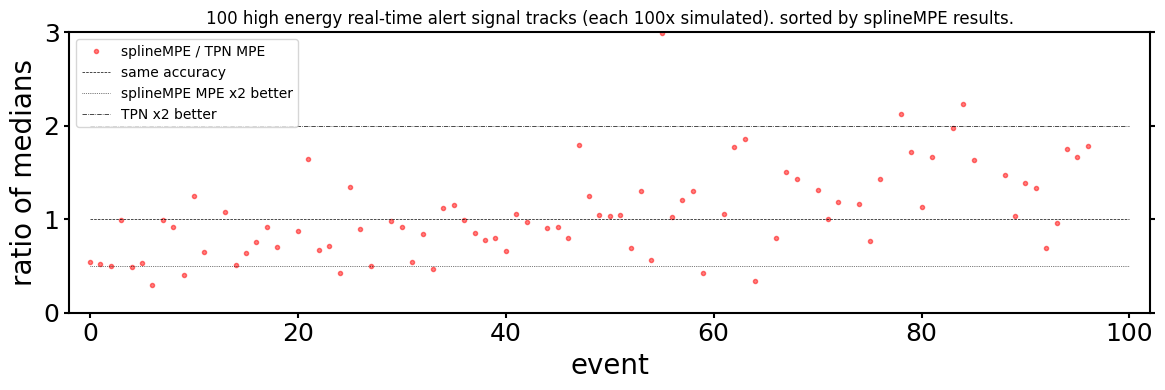

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, z/y, "ro", markersize=3, alpha=0.5, label='splineMPE / TPN MPE')
ax.plot([0.0, 100.0], [1.0, 1.0], linestyle='dashed', color='k', lw=0.5, label='same accuracy')
ax.plot([0.0, 100.0], [0.5, 0.5], linestyle='dotted', color='k', lw=0.5, label='splineMPE MPE x2 better')
ax.plot([0.0, 100.0], [2.0, 2.0], linestyle='dashdot', color='k', lw=0.5, label='TPN x2 better')
plot_args = {'xlabel':'event', 
                 'ylabel':'ratio of medians', 
                 'xlim':[-2.0, 102], 
                 'ylim':[0.0, 3.0]}
adjust_plot_1d(fig, ax, plot_args=plot_args)
ax.set_title("100 high energy real-time alert signal tracks (each 100x simulated). sorted by splineMPE results.")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()